**Równania różniczkowe - spectral bias**

In [59]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import deepxde as dde
import deepxde.backend as tf

**Zadanie 1.**

In [60]:
# Problem specific data
a = -2*np.pi
b = 2*np.pi

In [61]:
# Procedure definition
def Procedure(omega, hidden_layers, neurons_per_layer, num_training, num_test):
    # Domain
    def ode(x, y) :
        du_x = dde . grad . jacobian (y , x , i =0 , j =0)
        return du_x - tf.cos(omega*x)
    
    geom = dde.geometry.Interval(a, b)
    
    # Conditions and training data
    bc = dde.icbc.DirichletBC(geom, lambda x: 0,
                    lambda _, on_boundary: on_boundary)

    data = dde.data.PDE(
        geom,
        ode,
        bc,
        num_domain = num_training - 2,
        num_boundary = 2,
        num_test = num_test,
    )

    # Network
    layer_size = [1] + [neurons_per_layer]*hidden_layers + [1]
    activation = "tanh"
    initializer = "Glorot normal"
    net = dde.nn.FNN(layer_size, activation, initializer)

    # Model
    model = dde.Model(data, net)
    optimizer = "adam"
    model.compile(optimizer, lr=0.001)
    losshistory, train_state = model.train(iterations=50000)

    # Results
    x_data = np.linspace(a, b, num=num_test)[:, None]

    u_pred = model.predict(x_data)
    u_true = 1/omega * np.sin(omega*x_data)
    residual = model.predict(x_data, operator=ode)

    return x_data, u_pred, u_true, residual


Compiling model...
'compile' took 0.000300 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.43e-01, 1.38e+00]    [5.38e-01, 1.38e+00]    []  
1000      [1.02e-01, 2.14e-04]    [9.90e-02, 2.14e-04]    []  
2000      [5.70e-05, 6.25e-09]    [5.72e-05, 6.25e-09]    []  
3000      [2.17e-05, 8.01e-09]    [2.08e-05, 8.01e-09]    []  
4000      [8.44e-06, 8.51e-12]    [7.79e-06, 8.51e-12]    []  
5000      [4.59e-06, 6.28e-06]    [4.17e-06, 6.28e-06]    []  
6000      [2.91e-06, 7.42e-12]    [2.59e-06, 7.42e-12]    []  
7000      [2.37e-06, 1.74e-07]    [2.13e-06, 1.74e-07]    []  
8000      [2.12e-06, 1.56e-06]    [1.91e-06, 1.56e-06]    []  
9000      [1.81e-06, 4.74e-09]    [1.58e-06, 4.74e-09]    []  
10000     [1.58e-06, 2.10e-09]    [1.36e-06, 2.10e-09]    []  
11000     [1.37e-06, 5.55e-11]    [1.16e-06, 5.55e-11]    []  
12000     [1.19e-06, 2.41e-11]    [9.96e-07, 2.41e-11]    []  
13000     [1.04e-06, 5.68e-10]    [8.60e-07, 5

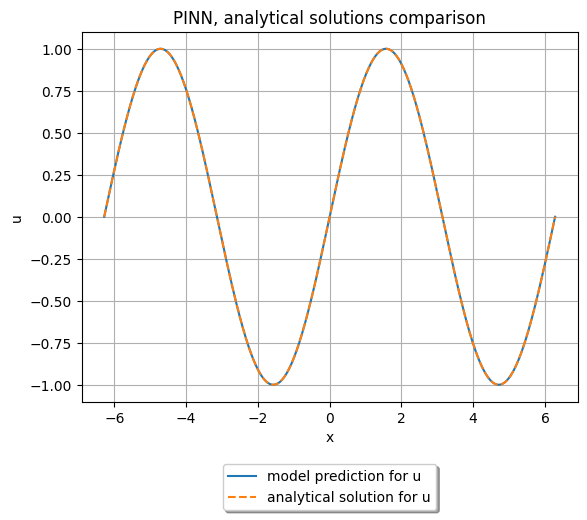

In [62]:
x_data, u_pred, u_true, residual = Procedure(1.0, 2, 16, 200, 1000)

# Plot
plt.title('PINN, analytical solutions comparison')
plt.plot(x_data, u_pred, label='model prediction for u')
plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('u')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

Compiling model...
'compile' took 0.000181 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.05e-01, 8.59e-03]    [5.04e-01, 8.59e-03]    []  
1000      [5.00e-01, 5.88e-11]    [5.00e-01, 5.88e-11]    []  
2000      [5.00e-01, 8.12e-12]    [5.00e-01, 8.12e-12]    []  
3000      [5.00e-01, 2.68e-08]    [5.00e-01, 2.68e-08]    []  
4000      [5.00e-01, 1.75e-11]    [5.00e-01, 1.75e-11]    []  
5000      [5.00e-01, 3.67e-12]    [5.00e-01, 3.67e-12]    []  
6000      [5.00e-01, 1.31e-10]    [5.00e-01, 1.31e-10]    []  
7000      [5.00e-01, 8.96e-08]    [5.00e-01, 8.96e-08]    []  
8000      [5.00e-01, 2.70e-06]    [5.00e-01, 2.70e-06]    []  
9000      [5.00e-01, 3.48e-11]    [5.00e-01, 3.48e-11]    []  
10000     [5.00e-01, 2.03e-12]    [5.00e-01, 2.03e-12]    []  
11000     [5.00e-01, 5.99e-07]    [5.00e-01, 5.99e-07]    []  
12000     [5.00e-01, 4.51e-08]    [5.00e-01, 4.51e-08]    []  
13000     [5.00e-01, 2.50e-11]    [5.00e-01, 2

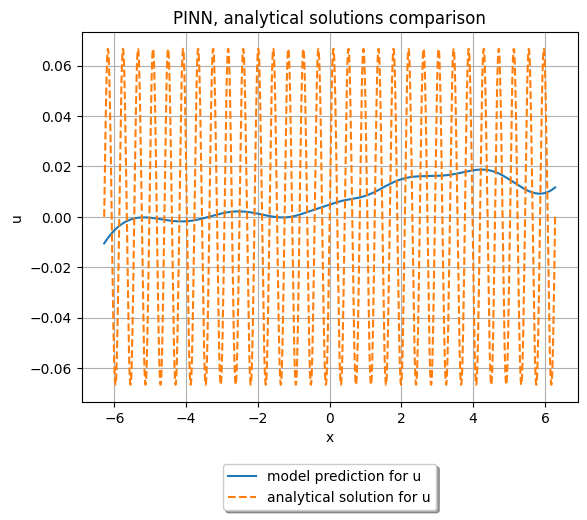

Compiling model...
'compile' took 0.000122 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.13e-01, 3.18e-01]    [5.13e-01, 3.18e-01]    []  
1000      [5.00e-01, 7.36e-12]    [5.00e-01, 7.36e-12]    []  
2000      [5.00e-01, 6.46e-11]    [5.00e-01, 6.46e-11]    []  
3000      [5.00e-01, 4.77e-11]    [5.00e-01, 4.77e-11]    []  
4000      [5.00e-01, 2.55e-11]    [5.00e-01, 2.55e-11]    []  
5000      [5.00e-01, 2.70e-04]    [5.00e-01, 2.70e-04]    []  
6000      [5.00e-01, 1.08e-10]    [5.00e-01, 1.08e-10]    []  
7000      [5.00e-01, 3.04e-10]    [5.00e-01, 3.04e-10]    []  
8000      [4.69e-01, 6.09e-07]    [4.68e-01, 6.09e-07]    []  
9000      [3.31e-01, 1.55e-05]    [3.31e-01, 1.55e-05]    []  
10000     [2.71e-01, 6.14e-04]    [2.71e-01, 6.14e-04]    []  
11000     [2.16e-01, 1.21e-07]    [2.15e-01, 1.21e-07]    []  
12000     [1.92e-01, 3.53e-07]    [1.91e-01, 3.53e-07]    []  
13000     [1.76e-01, 2.75e-06]    [1.75e-01, 2

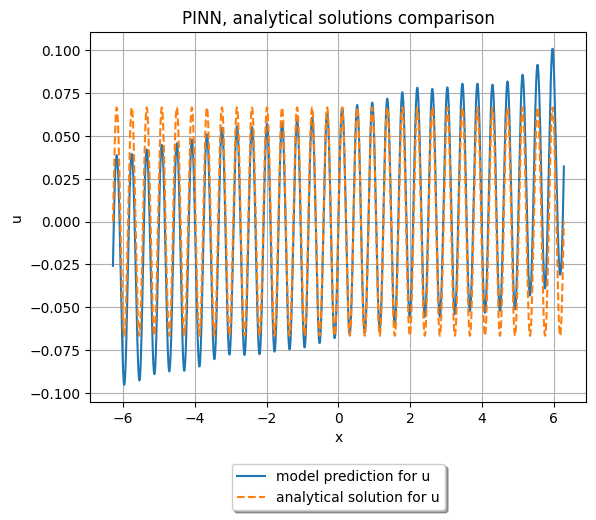

Compiling model...
'compile' took 0.000224 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.20e-01, 4.96e-01]    [5.20e-01, 4.96e-01]    []  
1000      [5.00e-01, 7.13e-12]    [5.00e-01, 7.13e-12]    []  
2000      [5.00e-01, 1.32e-10]    [5.00e-01, 1.32e-10]    []  
3000      [5.00e-01, 2.00e-11]    [5.00e-01, 2.00e-11]    []  
4000      [5.00e-01, 3.92e-11]    [5.00e-01, 3.92e-11]    []  
5000      [5.00e-01, 3.45e-10]    [5.00e-01, 3.45e-10]    []  
6000      [5.02e-01, 2.63e-03]    [5.02e-01, 2.63e-03]    []  
7000      [3.86e-01, 5.81e-08]    [3.86e-01, 5.81e-08]    []  
8000      [2.94e-01, 2.98e-05]    [2.94e-01, 2.98e-05]    []  
9000      [2.61e-01, 6.59e-03]    [2.61e-01, 6.59e-03]    []  
10000     [2.30e-01, 5.69e-04]    [2.29e-01, 5.69e-04]    []  
11000     [2.04e-01, 2.39e-03]    [2.04e-01, 2.39e-03]    []  
12000     [1.67e-01, 1.04e-03]    [1.67e-01, 1.04e-03]    []  
13000     [1.41e-01, 9.32e-06]    [1.40e-01, 9

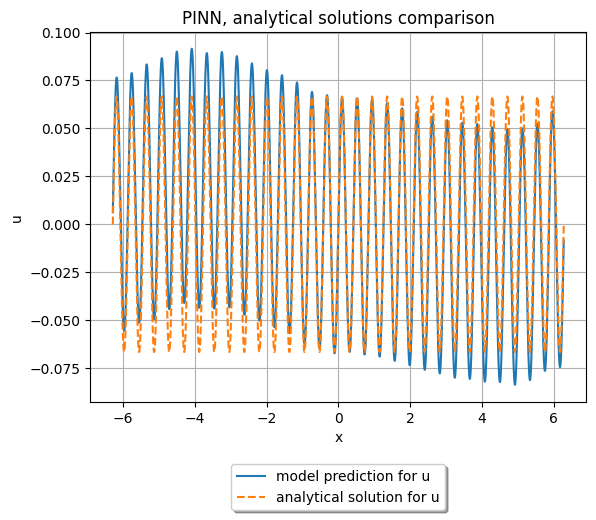

In [63]:
for layers, neurons in [(2, 16), (4, 64), (5, 128)]:  
        x_data, u_pred, u_true, residual = Procedure(15.0, layers, neurons, 200*15, 5000)

        # Plot
        plt.title('PINN, analytical solutions comparison')
        plt.plot(x_data, u_pred, label='model prediction for u')
        plt.plot(x_data, u_true, label='analytical solution for u', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
                fancybox=True, shadow=True, ncol=1)
        plt.grid()
        plt.show()